# Compare different optimization methods on regression tasks

In [1]:
import numpy as np
import torch
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline  
%config InlineBackend.figure_format='retina'
print ("PyTorch version:[%s]."%(torch.__version__))

# Device Configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print ("This notebook uses [%s]."%(device))

PyTorch version:[1.7.0+cu101].
This notebook uses [cuda:0].


### Set hyper-parameter

In [2]:
EPOCHS = 1000
LEARNING_RATE = 0.1
print ("Done.")

Done.


### Prepare dataset

Done.


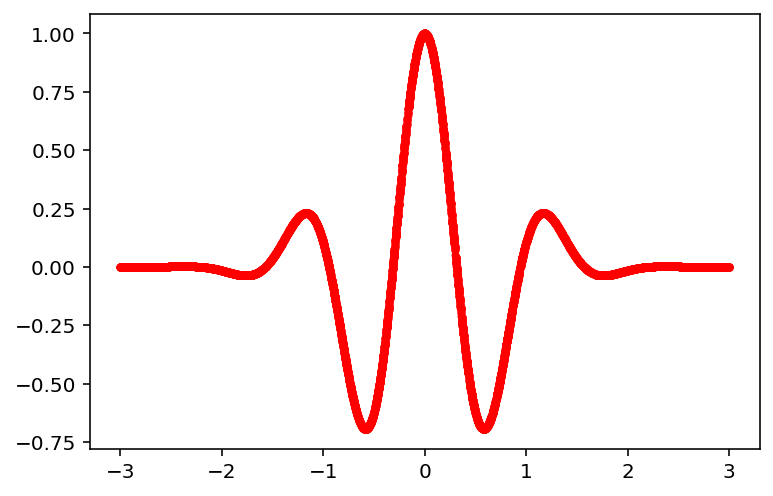

In [4]:
# 1D line
x = -3 + 6*np.random.rand(10000, 1)
y = np.exp(-(x**2))*np.cos(5*x)
plt.plot(x[:, 0], y[:, 0], 'r.')
X = torch.Tensor(x).to(device)
Y = torch.Tensor(y).to(device)
print ("Done.")

### Define a Model

In [5]:
class Model(nn.Module):
    def __init__(self, input_channel=1, hidden_size=128, output_channel=1, 
                 init_weight="he", init_bias="zero"):
        super(Model, self).__init__()

        self.init_weight = init_weight
        self.init_bias = init_bias

        self.linear1 = nn.Linear(input_channel, hidden_size)
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        self.linear3 = nn.Linear(hidden_size, output_channel)

        self.init_params()

    def init_params(self):
        init_weight_method = {
            "he": nn.init.kaiming_normal_, 
            "xavier": nn.init.xavier_normal_
        }
        init_bias_method = {
            "zero": nn.init.zeros_, 
            "uniform": nn.init.uniform_
        }
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                init_weight_method[self.init_weight](m.weight)
                init_bias_method[self.init_bias](m.bias)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
                
    def forward(self, X):
        X = F.relu((self.linear1(X)))
        X = F.relu((self.linear2(X)))
        X = self.linear3(X)
        return X
print ("Done.")

Done.


### Instantiate three different models

In [8]:
model_sgd = Model(init_weight='xavier').to(device)
sgd = optim.SGD(model_sgd.parameters(), lr=LEARNING_RATE)

model_momentum = Model(init_weight='xavier').to(device)
momentum = optim.SGD(model_momentum.parameters(), lr=LEARNING_RATE, momentum=0.9)

model_adam = Model(init_weight='xavier').to(device)
adam = optim.Adam(model_adam.parameters(), lr=LEARNING_RATE)

criterion = nn.MSELoss()
print ("Done.")

Done.


### Compute the number of parameters

In [9]:
def count_total_params(model):
    total_params = 0
    for param_name, param in model.named_parameters():
        if param.requires_grad:
            total_params += len(param.reshape(-1))
    print(f"Number of Total Parameters: {total_params:,d}")    

count_total_params(model_sgd)
count_total_params(model_momentum)
count_total_params(model_adam)

Number of Total Parameters: 16,897
Number of Total Parameters: 16,897
Number of Total Parameters: 16,897


### Train Each Model 

Start training !
epoch:[1/1000] sgd cost:[0.007] momentum cost:[0.051] adam cost:[0.000]


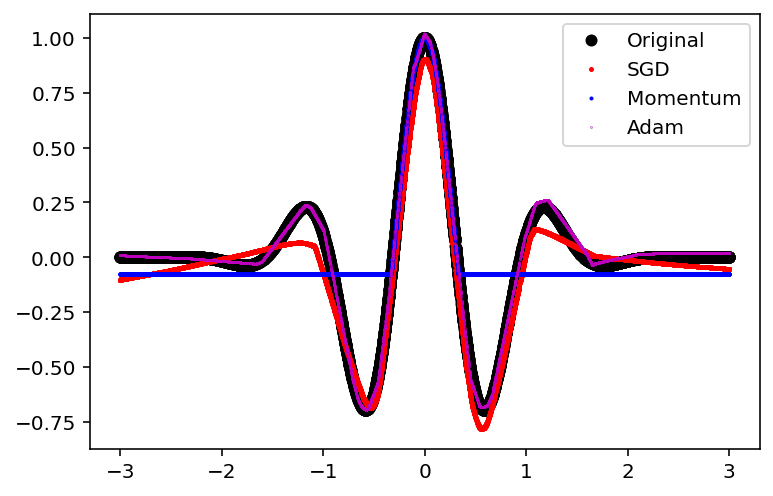

epoch:[21/1000] sgd cost:[0.006] momentum cost:[0.051] adam cost:[0.000]
epoch:[41/1000] sgd cost:[0.006] momentum cost:[0.051] adam cost:[0.000]
epoch:[61/1000] sgd cost:[0.006] momentum cost:[0.051] adam cost:[0.000]
epoch:[81/1000] sgd cost:[0.006] momentum cost:[0.051] adam cost:[0.000]
epoch:[101/1000] sgd cost:[0.006] momentum cost:[0.051] adam cost:[0.002]


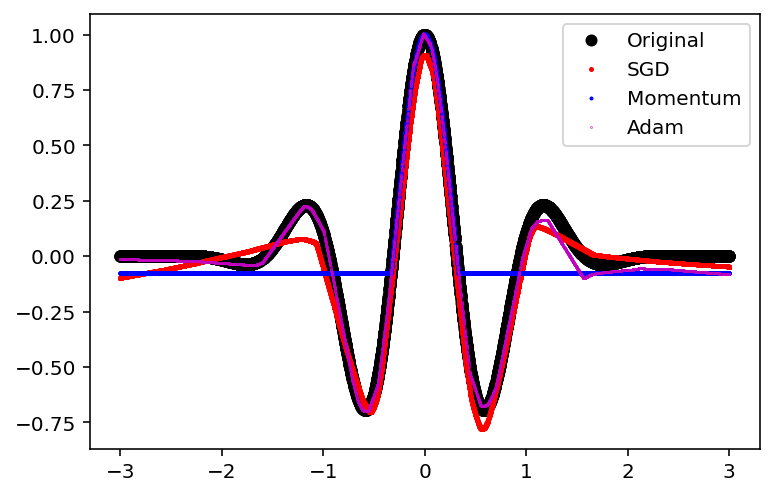

epoch:[121/1000] sgd cost:[0.006] momentum cost:[0.051] adam cost:[0.000]
epoch:[141/1000] sgd cost:[0.005] momentum cost:[0.051] adam cost:[0.000]
epoch:[161/1000] sgd cost:[0.005] momentum cost:[0.051] adam cost:[0.003]
epoch:[181/1000] sgd cost:[0.005] momentum cost:[0.051] adam cost:[0.001]
epoch:[201/1000] sgd cost:[0.005] momentum cost:[0.051] adam cost:[0.000]


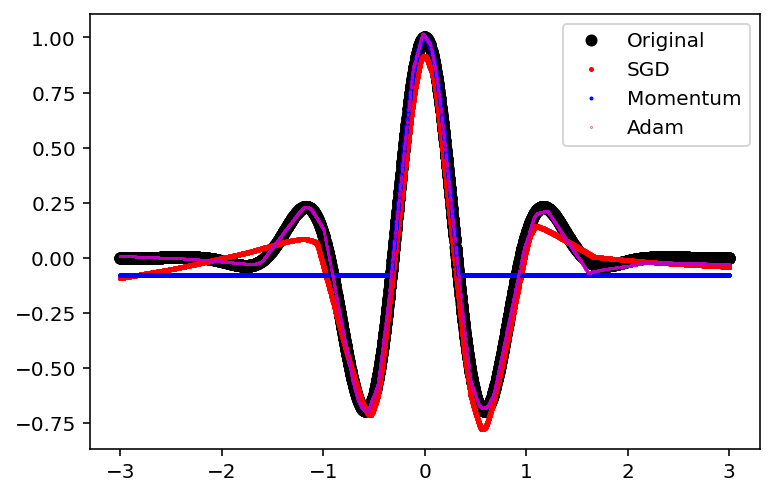

epoch:[221/1000] sgd cost:[0.005] momentum cost:[0.051] adam cost:[0.000]
epoch:[241/1000] sgd cost:[0.005] momentum cost:[0.051] adam cost:[0.000]
epoch:[261/1000] sgd cost:[0.005] momentum cost:[0.051] adam cost:[0.001]
epoch:[281/1000] sgd cost:[0.005] momentum cost:[0.051] adam cost:[0.000]
epoch:[301/1000] sgd cost:[0.004] momentum cost:[0.051] adam cost:[0.000]


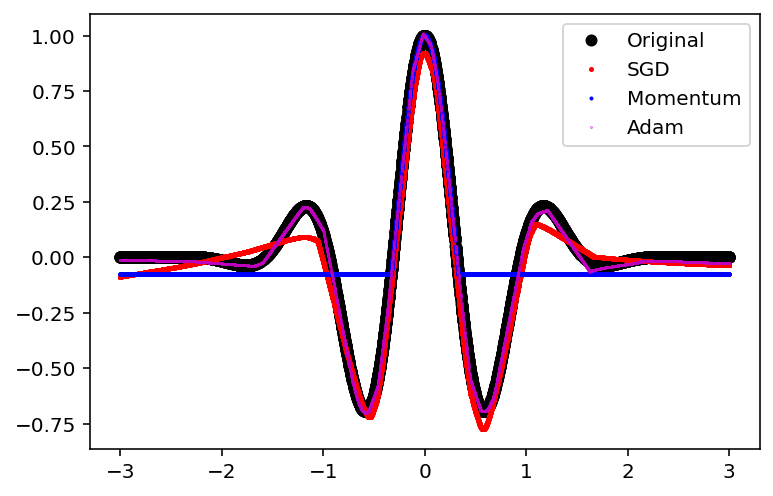

epoch:[321/1000] sgd cost:[0.004] momentum cost:[0.051] adam cost:[0.001]
epoch:[341/1000] sgd cost:[0.004] momentum cost:[0.051] adam cost:[0.000]
epoch:[361/1000] sgd cost:[0.004] momentum cost:[0.051] adam cost:[0.000]
epoch:[381/1000] sgd cost:[0.004] momentum cost:[0.051] adam cost:[0.000]
epoch:[401/1000] sgd cost:[0.004] momentum cost:[0.051] adam cost:[0.004]


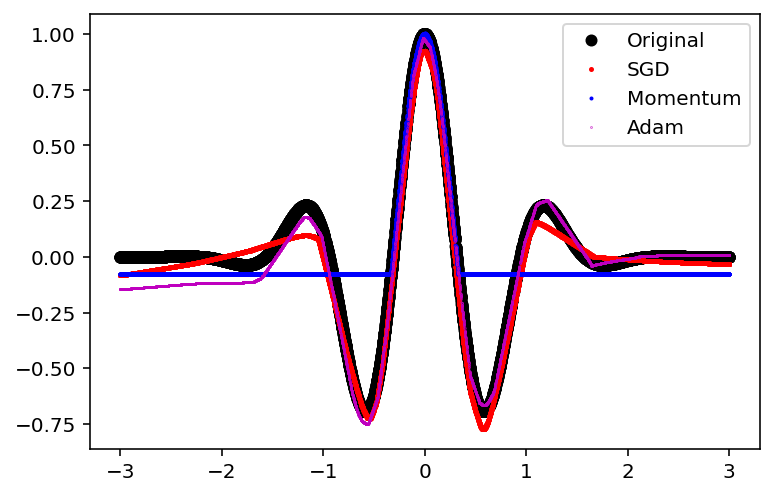

epoch:[421/1000] sgd cost:[0.004] momentum cost:[0.051] adam cost:[0.000]
epoch:[441/1000] sgd cost:[0.004] momentum cost:[0.051] adam cost:[0.000]
epoch:[461/1000] sgd cost:[0.004] momentum cost:[0.051] adam cost:[0.000]
epoch:[481/1000] sgd cost:[0.004] momentum cost:[0.051] adam cost:[0.000]
epoch:[501/1000] sgd cost:[0.004] momentum cost:[0.051] adam cost:[0.000]


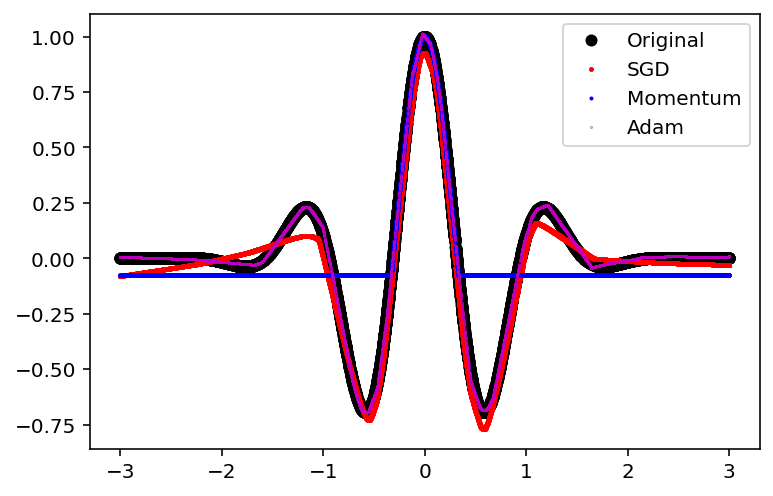

epoch:[521/1000] sgd cost:[0.004] momentum cost:[0.051] adam cost:[0.001]
epoch:[541/1000] sgd cost:[0.004] momentum cost:[0.051] adam cost:[0.000]
epoch:[561/1000] sgd cost:[0.004] momentum cost:[0.051] adam cost:[0.001]
epoch:[581/1000] sgd cost:[0.004] momentum cost:[0.051] adam cost:[0.000]
epoch:[601/1000] sgd cost:[0.003] momentum cost:[0.051] adam cost:[0.000]


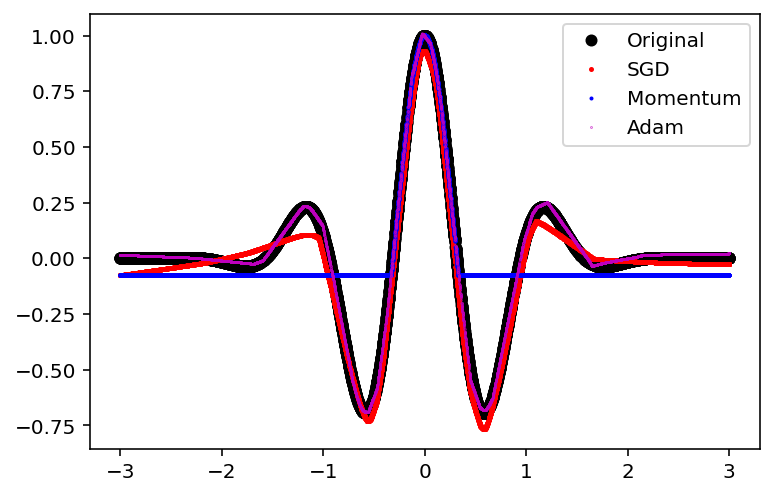

epoch:[621/1000] sgd cost:[0.003] momentum cost:[0.051] adam cost:[0.000]
epoch:[641/1000] sgd cost:[0.003] momentum cost:[0.051] adam cost:[0.007]
epoch:[661/1000] sgd cost:[0.003] momentum cost:[0.051] adam cost:[0.001]
epoch:[681/1000] sgd cost:[0.003] momentum cost:[0.051] adam cost:[0.000]
epoch:[701/1000] sgd cost:[0.003] momentum cost:[0.051] adam cost:[0.000]


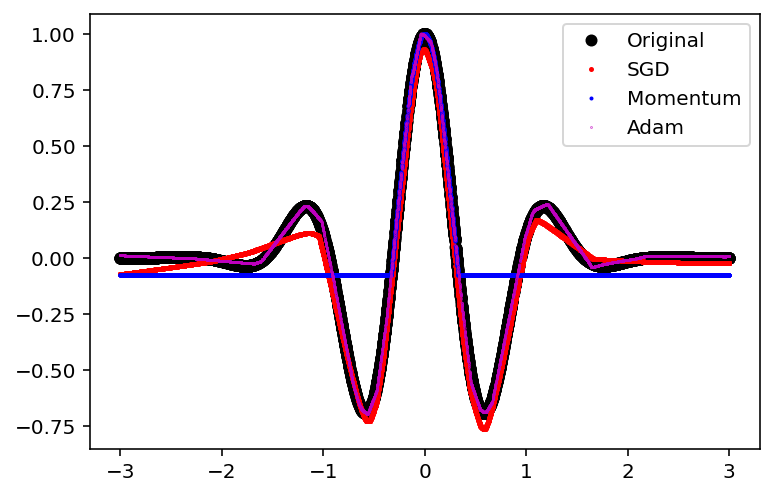

epoch:[721/1000] sgd cost:[0.003] momentum cost:[0.051] adam cost:[0.000]
epoch:[741/1000] sgd cost:[0.003] momentum cost:[0.051] adam cost:[0.000]
epoch:[761/1000] sgd cost:[0.003] momentum cost:[0.051] adam cost:[0.001]
epoch:[781/1000] sgd cost:[0.003] momentum cost:[0.051] adam cost:[0.000]
epoch:[801/1000] sgd cost:[0.003] momentum cost:[0.051] adam cost:[0.000]


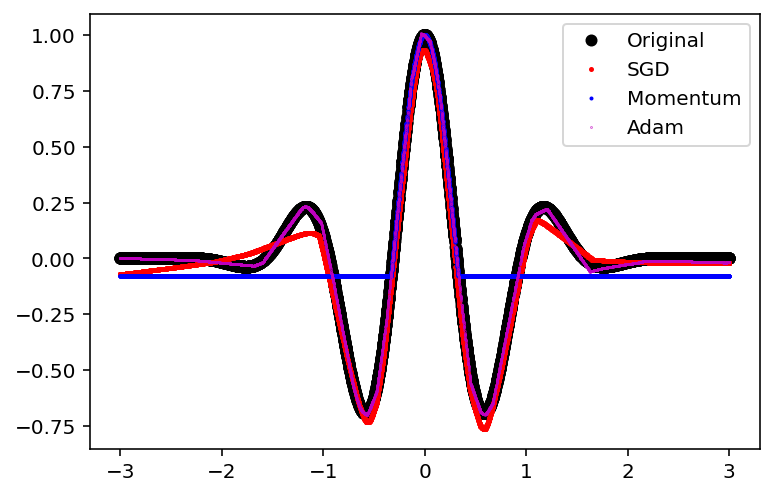

epoch:[821/1000] sgd cost:[0.003] momentum cost:[0.051] adam cost:[0.000]
epoch:[841/1000] sgd cost:[0.003] momentum cost:[0.051] adam cost:[0.000]
epoch:[861/1000] sgd cost:[0.003] momentum cost:[0.051] adam cost:[0.000]
epoch:[881/1000] sgd cost:[0.003] momentum cost:[0.051] adam cost:[0.001]
epoch:[901/1000] sgd cost:[0.003] momentum cost:[0.051] adam cost:[0.000]


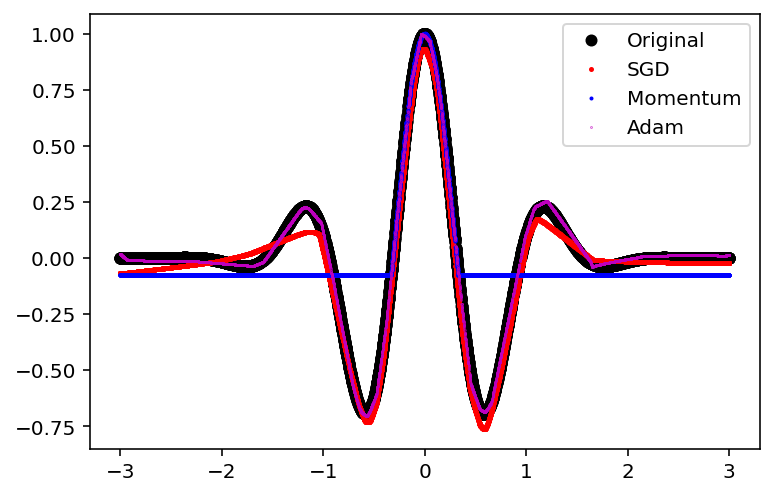

epoch:[921/1000] sgd cost:[0.003] momentum cost:[0.051] adam cost:[0.000]
epoch:[941/1000] sgd cost:[0.003] momentum cost:[0.051] adam cost:[0.000]
epoch:[961/1000] sgd cost:[0.003] momentum cost:[0.051] adam cost:[0.001]
epoch:[981/1000] sgd cost:[0.003] momentum cost:[0.051] adam cost:[0.001]


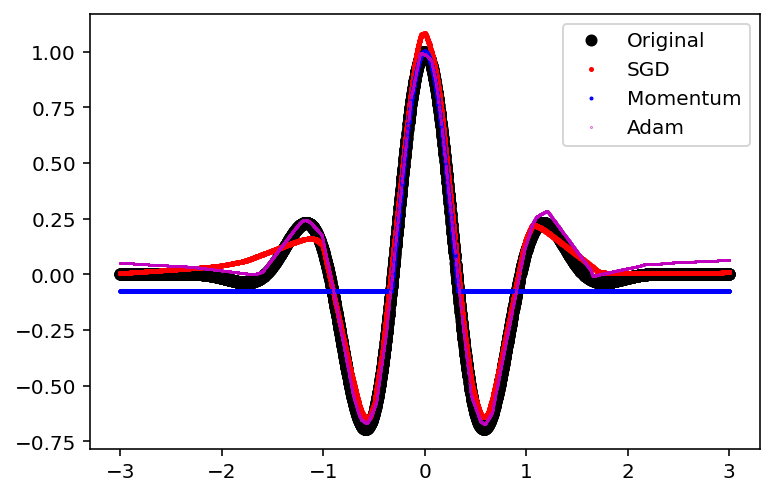

Done.


In [11]:
# Training Phase
plot_every,print_every = 100,20
print("Start training !")

# Training loop
for epoch in range(EPOCHS):
    
    # SGD model
    y_pred_sgd = model_sgd.forward(X)
    loss_sgd = criterion(y_pred_sgd, Y)

    sgd.zero_grad()
    loss_sgd.backward()
    sgd.step()

    # Momentum model
    y_pred_momentum = model_momentum.forward(X)
    loss_momentum = criterion(y_pred_momentum,Y)

    momentum.zero_grad()
    loss_momentum.backward()
    momentum.step()
        
    # Adam model
    y_pred_adam = model_adam.forward(X)
    loss_adam = criterion(y_pred_adam, Y)

    adam.zero_grad()
    loss_adam.backward()
    adam.step()

    if epoch % print_every == 0:
        print(f"epoch:[{epoch+1}/{EPOCHS}] sgd cost:[{loss_sgd:.3f}] momentum cost:[{loss_momentum:.3f}] adam cost:[{loss_adam:.3f}]")
    
    if epoch % plot_every == 0 :

        plt.plot(x, y, 'k.', markersize=10)
        plt.plot(X.cpu().detach().numpy(), y_pred_sgd.cpu().detach().numpy(), 'r.', markersize=3)
        plt.plot(X.cpu().detach().numpy(), y_pred_momentum.cpu().detach().numpy(), 'b.', markersize=2)
        plt.plot(X.cpu().detach().numpy(), y_pred_adam.cpu().detach().numpy(), 'm.', markersize=0.5)
        plt.legend(["Original", "SGD", "Momentum", "Adam"], loc="upper right")
        plt.show()

plt.plot(x, y, 'k.', markersize=10)
plt.plot(X.cpu().detach().numpy(), y_pred_sgd.cpu().detach().numpy(), 'r.', markersize=3)
plt.plot(X.cpu().detach().numpy(), y_pred_momentum.cpu().detach().numpy(), 'b.', markersize=2)
plt.plot(X.cpu().detach().numpy(), y_pred_adam.cpu().detach().numpy(), 'm.', markersize=0.5)
plt.legend(["Original", "SGD", "Momentum", "Adam"], loc="upper right")
plt.show()
print("Done.")